# Homework 6 writeup solutions

## Name: Jaiden Atterbury - Section B

## Problem 1

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

### Part a - Create a meshgrid

In [91]:
# Define the theta values
theta = np.linspace(-3*np.pi, 3*np.pi, 25)

# Define the v values
v = np.linspace(-3, 3, 25)

# Create the meshgrid
THETA, V = np.meshgrid(theta, v)

### Parts b,c and e - Create a quiver plot with appropriate labels and axis limits

In order to create a quiver plot we are going to need to fill in the run and rise arguments, in this case each slope in the quiver plot corresponds to $\frac{dv}{d\theta} = \frac{dv/dt}{d\theta/dt}$. Thus our run is $
\frac{d\theta}{dt}$ and our rise is $\frac{dv}{dt}$. It turns out that we already know what these functions are as we defined these in coding problem 3. The following code will define these two functions so that we can use them in the ax.quiver() method.

In [92]:
# Define the system of ODEs for use in ax.quiver()

# Define the parameters we are going to use:
g = 9.8
L = 11
sigma = 0.12

# Define the anonymous function we will solve:
tprime = lambda theta, v: v
vprime = lambda theta, v: (-g/L) * np.sin(theta) - sigma * v

(-3, 3)

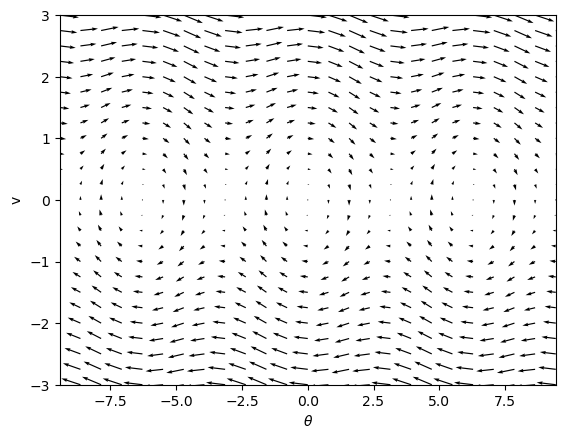

In [93]:
# Create subplots
fig, ax = plt.subplots()

# Create quiver grid
ax.quiver(THETA, V, tprime(THETA, V), vprime(THETA, V))

# Add axis labels
ax.set_xlabel(r'$\theta$')
ax.set_ylabel("v")

# Set axis displays
ax.set_xlim(-3*np.pi, 3*np.pi)
ax.set_ylim(-3, 3)

### Part d - Include trajectories.

In order to create the trajectories/solution to the ODE at different intial conditions, we will need to create an anonymous function that will allow us to solve the system of ODEs by using scipy.integrate.solve_ivp. The code below defines this function and caluclates the different trajectories.

In [94]:
# Define the ODE vector to be solved:
odefun2 = lambda t, p: np.array([tprime(p[0], p[1]), vprime(p[0], p[1])])

# Define step size:
dt = 0.01

# Define time array for solutions:
ts = np.arange(0, 50 + dt, dt)

# Different initial conditions:
tv_01 = np.array([np.pi, 0.1])
tv_02 = np.array([np.pi, -0.1])
tv_03 = np.array([2*np.pi, -3])
tv_04 = np.array([-2*np.pi, 3])

# Different solutions to the ODE at the different initial conditions:

# Solution for initial condition 1:
sol1 = scipy.integrate.solve_ivp(odefun2, [0, 50 + dt], tv_01, t_eval = ts)
tvsol1 = sol1.y
thsol1 = tvsol1[0, :]
vsol1 = tvsol1[1, :]


# Solution for initial condition 2:
sol2 = scipy.integrate.solve_ivp(odefun2, [0, 50 + dt], tv_02, t_eval = ts)
tvsol2 = sol2.y
thsol2 = tvsol2[0, :]
vsol2 = tvsol2[1, :]

# Solution for initial condition 3:
sol3 = scipy.integrate.solve_ivp(odefun2, [0, 50 + dt], tv_03, t_eval = ts)
tvsol3 = sol3.y
thsol3 = tvsol3[0, :]
vsol3 = tvsol3[1, :]

# Solution for initial condition 4:
sol4 = scipy.integrate.solve_ivp(odefun2, [0, 50 + dt], tv_04, t_eval = ts)
tvsol4 = sol4.y
thsol4 = tvsol4[0, :]
vsol4 = tvsol4[1, :]

Now that we have solved for these different trajectories, we will add them to the above quiver plot.

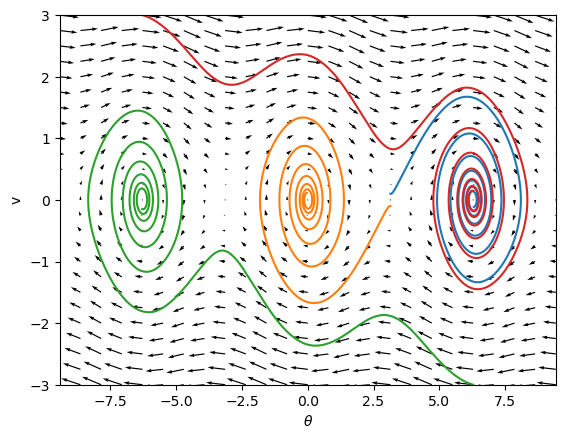

In [95]:
# Plot solution for initial condition 1: 
ax.plot(thsol1, vsol1)

# Plot solution for initial condition 2:
ax.plot(thsol2, vsol2)

# Plot solution for initial condition 3: 
ax.plot(thsol3, vsol3)

# Plot solution for initial condition 4:
ax.plot(thsol4, vsol4)

fig

### Part f - Discussion

#### Part (i) - Long-term behavior.

As time increases ($t \to \infty$), the solutions with the different initial conditions, and every initial condition for that matter, are all going to the same physical situation. Due to damping, instead of continuous oscialltions, or in the case of extreme intitial velocity continously going around the hinge, we see that all of the answers converge to $v = 0$ and $\theta = -2\pi, 0, 2\pi$. Since $\theta = -2\pi, 0, 2\pi$ represents no angle at all/directly under the hinge, as $t \to \infty$ all of the initial conditions come to rest after a certain amount of time.

#### Part (ii) - Comparing two solutions with $\theta_0 = \pi$. 

As exlplained above, the two solutions with initial conditions $(\theta(0),v(0))$ = $(\pi,0.1)$ and $(\theta(0),v(0))$ = $(\pi,−0.1)$, have the same behavior as $t \to \infty$, however there is a subtle differene to their behavior intially. First off, both of these initial conditions start with the mass being placed directly over the hinge $(\theta = \pi)$, however, one of the initial conditions has the mass being displaced in the positive direction (to the right), while the other has the mass being displaced in the negative direction, each with the same initial **speed** of 0.1. (Note that speed is the magnitude of velocity, while velocity itself takes into account the direction of displacement). Furthermore, since the speed of 0.1 is pretty low, in both cases the mass doesn't go all the way around the hinge, it gets near the top then slowly starts osciallating around $\theta = 0$ until it eventually dies out as explained in the previous section. Technically one of the intial conditions osciallates around $\theta = 2\pi$ but this is physically the same as oscillating around $\theta = 0$, since all of these angles represent directly under the hinge/resting position.

#### Part (iii) - Comparing two solutions with equal and opposite $\theta_0$ and $v_0$. 

Unlike the previous initial conditions, there is a major difference in what is physically happening to the pendulum with the initial
conditions $(\theta,v) = (2\pi,−3)$ and $(\theta,v) = (−2\pi,3)$. In both cases, the mass starts directly under the hinge, however, one is displaced in the positive direction (to the right) and one is displaced in the negative direction (to the left), both with an intial speed of 3. Since this speed is significantly greater than 0.1 as in the previous problem we can see from the phase portrait that in both cases the pendelum takes 2 full trips around the hinge, until the speed is no longer enough to get the mass completely around the hinge. After this, in both cases the mass slowly starts osciallating around $\theta = 0$ until it eventually dies out as just as it did in the previous two sections. Technically the intial conditions osciallates around $\theta = 2\pi$  and $\theta = -2\pi$ respectively, but this is physically the same as oscillating around $\theta = 0$, since all of these angles represent directly under the hinge/resting position.